In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sage.all_cmdline import *

from ctmc.metrics import *
from ctmc.generator import *

In [3]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'roboto'

In [4]:
from ctmc.model import *

In [5]:
par = {k: 100, gamm: 0.00083, beta: 0.314, omegaA: 60, omegaB: 40}
rp = {pA: 0.5, pB: 0.5, pAB: 0.33, pBA: 0.33}

In [6]:
fake_pi = vector(var("π1 π2 π3 π4 π5 π6 π7 π8 π9"))

In [7]:
pi.subs(par)

(0.45730066177094353, 0.19904063213177775, 0.1444722431826512, 0.0940997974179595, 0.028123225521950432, 0.057124387861918084, 0.014593817040464955, 0.0038497433507232864, 0.0013954917216113178)

In [8]:
(mining_throughput(pi) == total_throughput(pi)).subs(par)

0.09326036765671757 == 0.09326036765671758

In [9]:
mining_throughput(fake_pi) == total_throughput(fake_pi)

k*γ*(π1 + π3 + π4 + π6) + 2*γ*(π3 + π6 + π8)*ωA + 2*γ*(π4 + π6 + π9)*ωB + γ*π2 == -((pA - 1)*π3 + (pB - 1)*π4 + (pAB + pBA - 1)*π6)*k*γ + (pA*π3 + pAB*π6)*k*γ + (pB*π4 + pBA*π6)*k*γ + k*γ*π1 + 2*γ*(π3 + π6 + π8)*ωA + 2*γ*(π4 + π6 + π9)*ωB + γ*π2

In [10]:
print(poolA_throughput(fake_pi))
print(poolB_throughput(fake_pi))
print(fair_throughput(fake_pi))

(pA*π3 + pAB*π6)*k*γ + 2*γ*(π3 + π6 + π8)*ωA
(pB*π4 + pBA*π6)*k*γ + 2*γ*(π4 + π6 + π9)*ωB
-((pA - 1)*π3 + (pB - 1)*π4 + (pAB + pBA - 1)*π6)*k*γ + k*γ*π1 + γ*π2


In [11]:
pi.subs(par | {omegaA: 100, omegaB: 0})

(0.47596397318210976, 0.19467168133792173, 0.2605047971806301, 7.56531074873471e-17, 0.05695258473924459, 3.782655374367355e-17, 0, 0.011906963560093955, 3.999495491369306e-17)

In [12]:
revenue_msA = poolA_revenue(pi) / omegaA
revenue_msB = poolB_revenue(pi) / omegaB
revenue_mF = fair_revenue(pi) / k

In [14]:
tot = 200
v = var('v')

[s_ratio] = solve([k + omegaA + omegaB == tot,
                   omegaA == v * tot,
                   omegaB == 2/3 * omegaA],
                  [omegaA, omegaB, k], solution_dict=True)
[s_og] = solve([k + omegaA + omegaB == tot,
                omegaA == v * tot,
                omegaB == 0],
               [omegaA, omegaB, k], solution_dict=True)

s_ratio, s_og

({ωA: 200*v, ωB: 400/3*v, k: -1000/3*v + 200},
 {ωA: 200*v, ωB: 0, k: -200*v + 200})

In [15]:
f_sa = revenue_msA.subs(par | rp | s_ratio)
f_sb = revenue_msB.subs(par | rp | s_ratio)
f_f = revenue_mF.subs(par | rp | s_ratio)

f_sa_og = revenue_msA.subs(par | rp | s_og)
f_f_og = revenue_mF.subs(par | rp | s_og)

x_values = np.linspace(0.01, 0.5, 10)
y_values_sa = np.array([f_sa.subs({v: x}) for x in x_values])
y_values_sb = np.array([f_sb.subs({v: x}) for x in x_values])
y_values_f = np.array([f_f.subs({v: x}) for x in x_values])
y_values_sa_og = np.array([f_sa_og.subs({v: x}) for x in x_values])
y_values_f_og = np.array([f_f_og.subs({v: x}) for x in x_values])

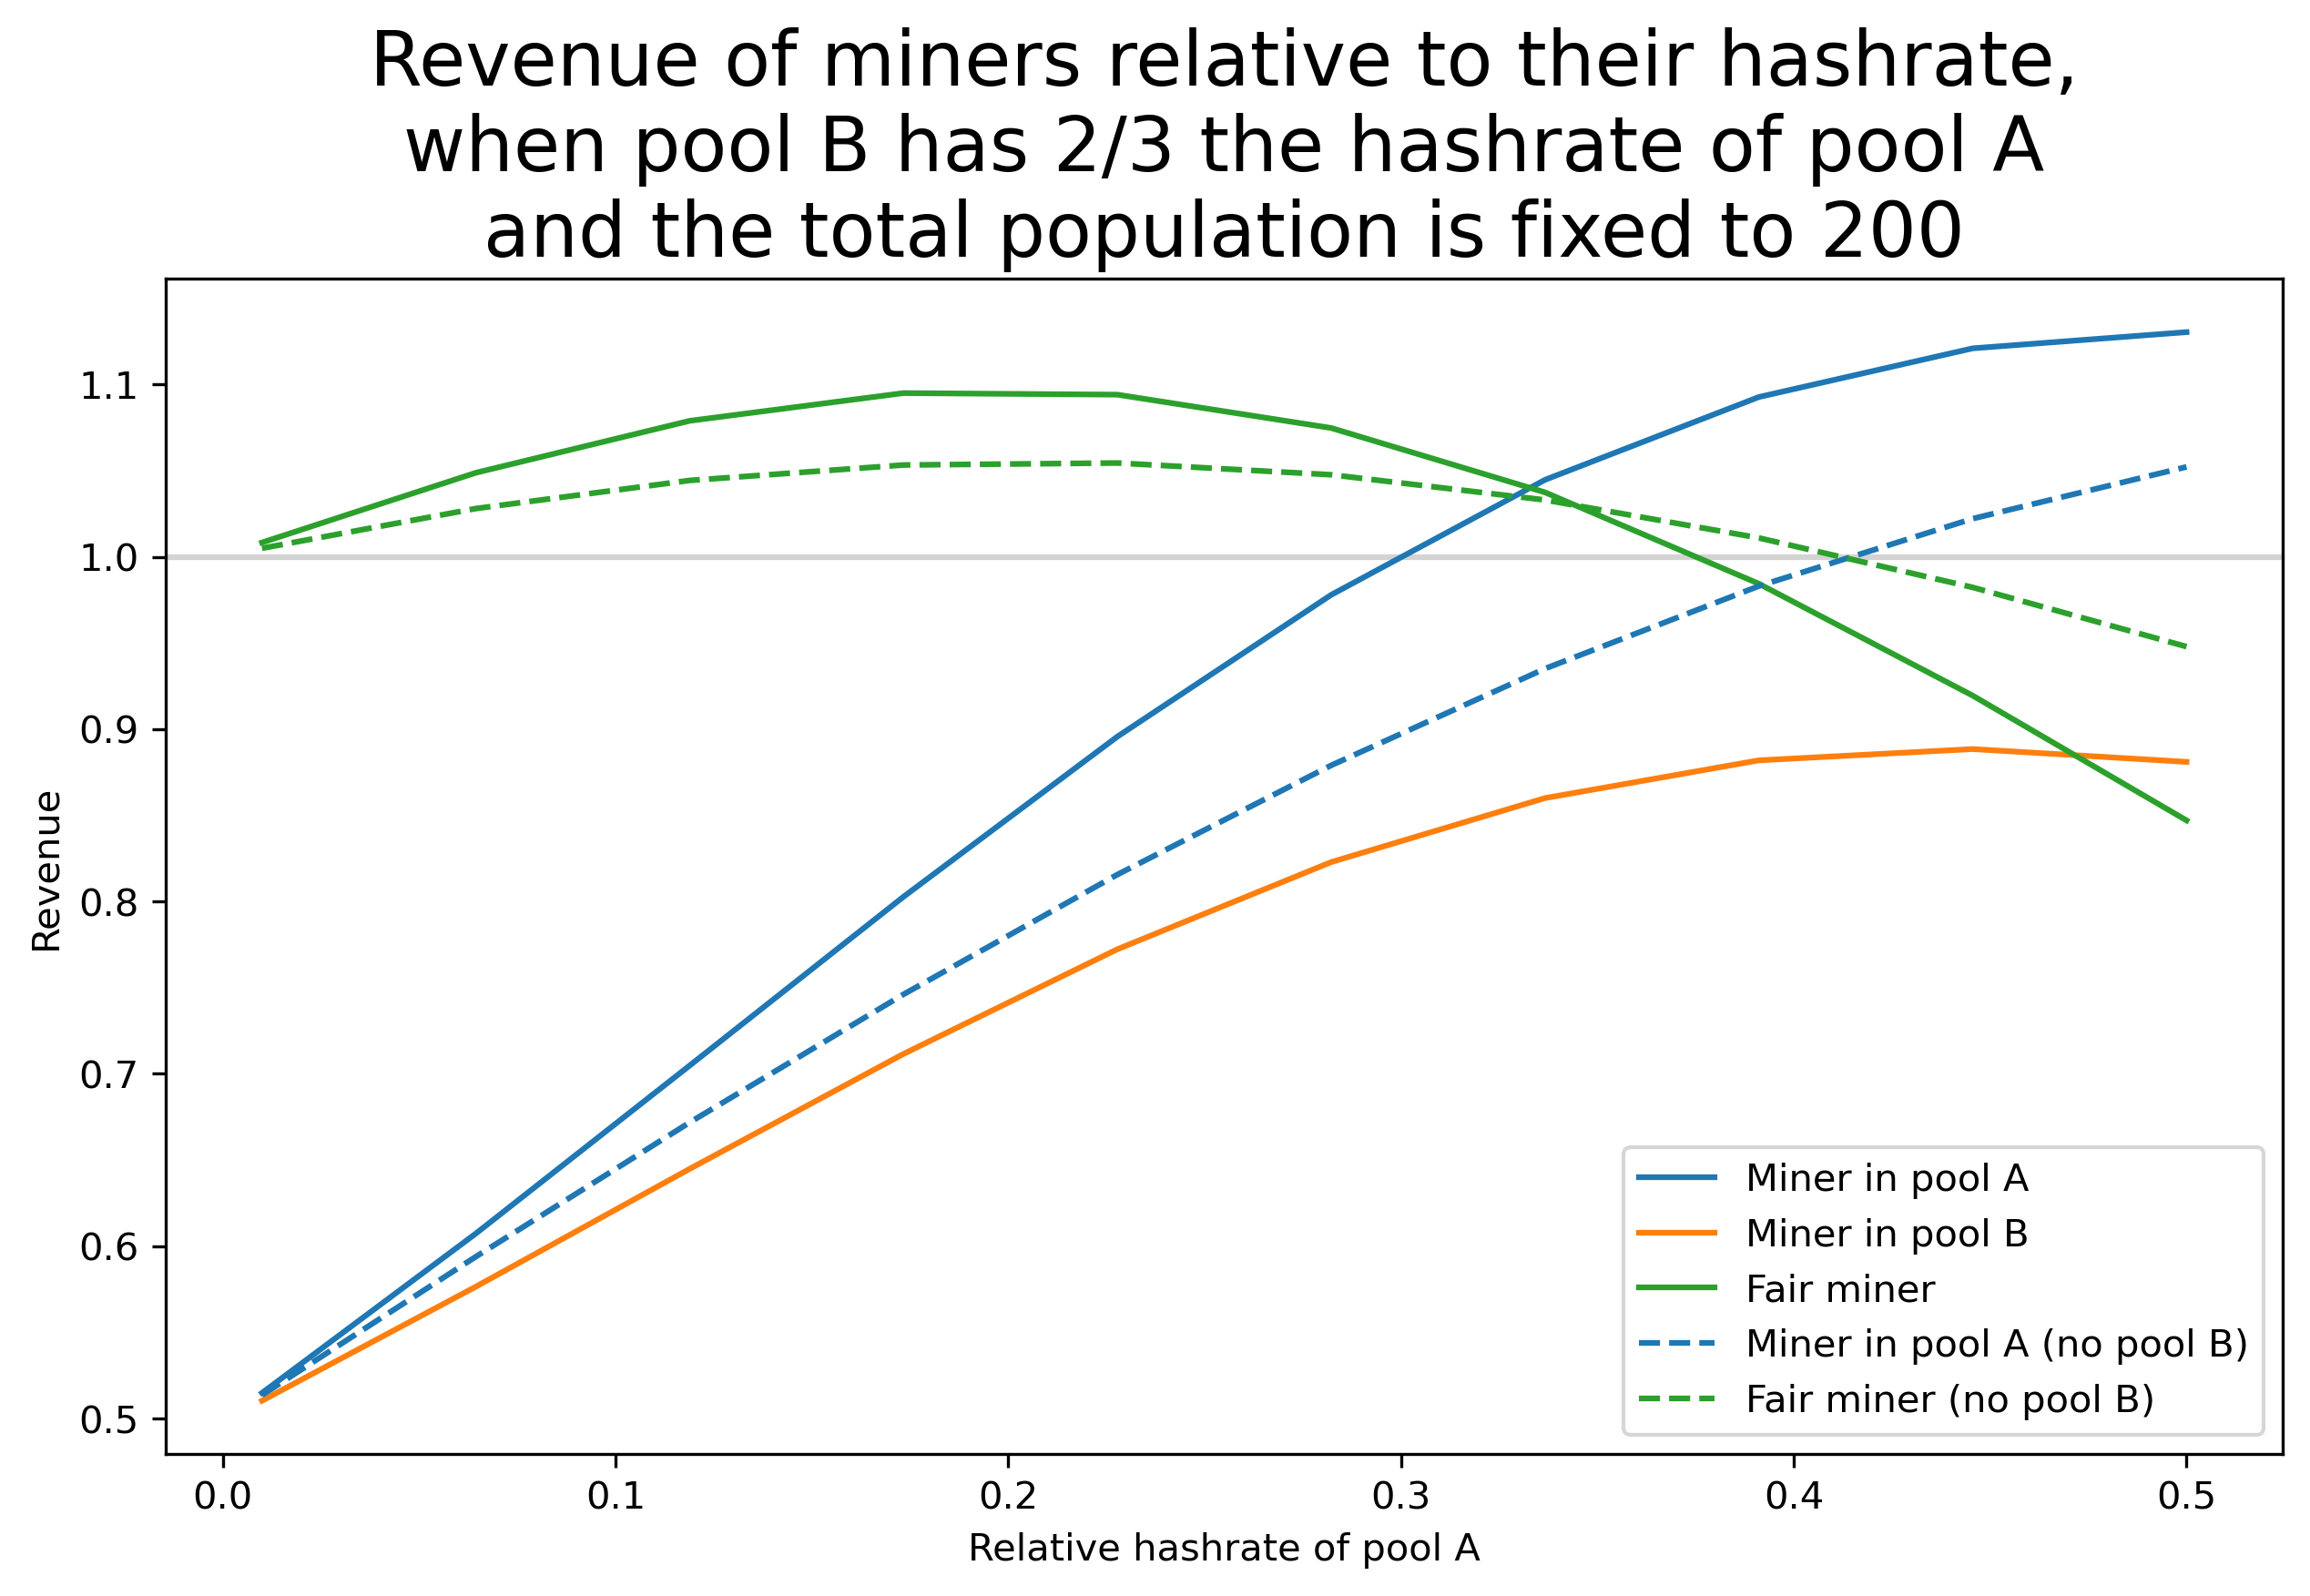

In [18]:
fig, ax = plt.subplots(figsize=(10, 5.7))

ax.axhline(y=1, color='lightgray')

ax.plot(x_values, y_values_sa*tot, label='Miner in pool A', color='tab:blue')
ax.plot(x_values, y_values_sb*tot, label='Miner in pool B', color='tab:orange')
ax.plot(x_values, y_values_f*tot, label='Fair miner', color='tab:green')
ax.plot(x_values, y_values_sa_og*tot, label='Miner in pool A (no pool B)', linestyle='--', color='tab:blue')
ax.plot(x_values, y_values_f_og*tot, label='Fair miner (no pool B)', linestyle='--', color='tab:green')


ax.set_title('Revenue of miners relative to their hashrate,\nwhen pool B has 2/3 the hashrate of pool A\nand the total population is fixed to 200', fontsize=20)
ax.set_xlabel('Relative hashrate of pool A')
ax.set_ylabel('Revenue')
ax.legend()

pass